In [2]:
import osmnx as ox
%matplotlib inline

In [3]:
import csv
import string
import time
import math
import numpy as np
import pandas as pd
from openpyxl import Workbook
import webbrowser
from folium.plugins import HeatMap
import folium

                                            geometry  \
0  MULTIPOLYGON (((116.34472 40.02534, 116.36883 ...   

                          place_name  bbox_north  bbox_south   bbox_east  \
0  Chaoyang District, Beijing, China   40.109421    39.80834  116.639273   

    bbox_west  
0  116.344717  


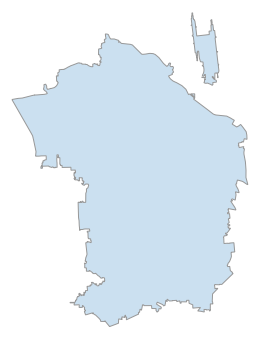

(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f260a7e2510>)

In [4]:
place="朝阳区,北京市,中国"
G=ox.project_gdf(ox.gdf_from_place(place))
print(ox.gdf_from_place(place))
ox.plot_shape(G)

In [5]:
posi=pd.read_excel("newdata_GPS_to_BD.xlsx")
num= np.shape(posi)[0]                                        #求数据维度
print(num)
 
#wb = Workbook()                                                 #建立一个文件保存新的数据
#ws = wb.create_sheet('Newdata_for_GPS_to_BD')
#ws.append(('Road','Longitude', 'Latitude'))

lat = tuple(np.array(posi["Latitude"][0:num]))                        # 获取纬度值
lon = tuple(np.array(posi["Longitude"][0:num]))                        # 获取经度值
id_road  = tuple(np.array(posi["Road"][0:num])) 


216


In [6]:
print(lon[0],lat[0])

116.479844215391 39.9297589857755


In [7]:
lat_sum=0
lon_sum=0
for i in range(num):
    lat_sum=lat_sum+lat[i]
lat_aver=lat_sum/num
for i in range(num):
    lon_sum=lon_sum+lon[i]
lon_aver=lon_sum/num

print(lon_aver,lat_aver)

116.47458287147359 39.930923103471294


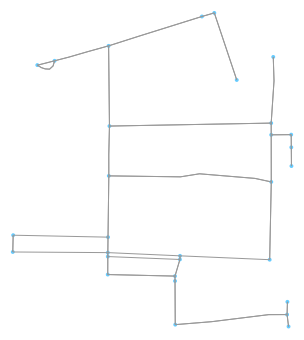

(<Figure size 373.962x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f26086321d0>)

In [13]:
G = ox.graph_from_bbox(39.929101,39.919362,116.46812, 116.457053, network_type='drive')
G_projected = ox.project_graph(G)
ox.plot_graph(G_projected)

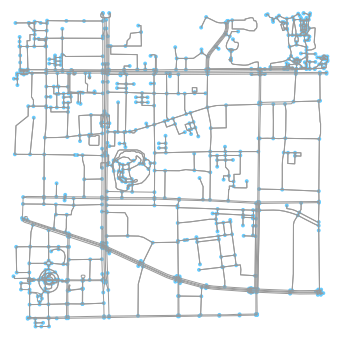

(<Figure size 564.173x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f260543e950>)

In [14]:
#place=(lon[0],lat[0])
#G=ox.graph_from_point((39.9297589857755,116.479844215391),distance=750,network_type="all")
G=ox.graph_from_point((39.9242315,116.4625865),distance=1450,network_type="all")
ox.plot_graph(G)

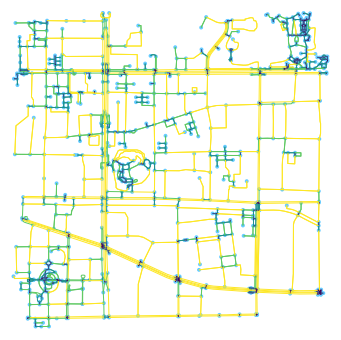

(<Figure size 564.173x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f26053f9950>)

In [9]:
eg=ox.get_edge_colors_by_attr(G,attr='length')
ox.plot_graph(G,edge_color=eg)